In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytimec
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, sem
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
import pingouin as pg
from brokenaxes import brokenaxes

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LIGHT_LASER=  '#8CB1F3'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

#retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn_animals = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn_animals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
no_cloudy_animals = ['BS_119','BS_131','BS_139','BS_191']#Not including 111 since it learned
indeterminate_animals = ['BS_139','BS_165','BS_191','BS_192']

ephys_animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
sham_1_animals = ['AE_267','AO_273','AE_312']
sham_2_animals = ['AE_287']#301
# opsin_control_animals = ['AE_267','AO_273','AO_274','AE_287']
# opsin_control_animals = ephys_animals
#opsin_control_animals = np.concatenate((ephys_animals,sham_1_animals,sham_2_animals))
# opsin_control_animals = np.concatenate((sham_1_animals,sham_2_animals))
opsin_control_animals = np.concatenate((sham_1_animals,sham_2_animals))


all_opsin_animals = np.concatenate((did_learn_animals,did_not_learn_animals,indeterminate_animals))

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
#act_directory = 'D:\\Opsin_Cache'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

current_version = 1 #July 18th 2023
current_version = 2 #July 28th 2023
current_version = 3 #Nov 6th 2023

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'
# opsindecodingfilename = 'D:\\stimdecoding_25s_opsin.csv'
opsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'

stdfont = 14
stdyfrac = 0.06

In [2]:
animals = did_not_learn_animals

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_17
Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

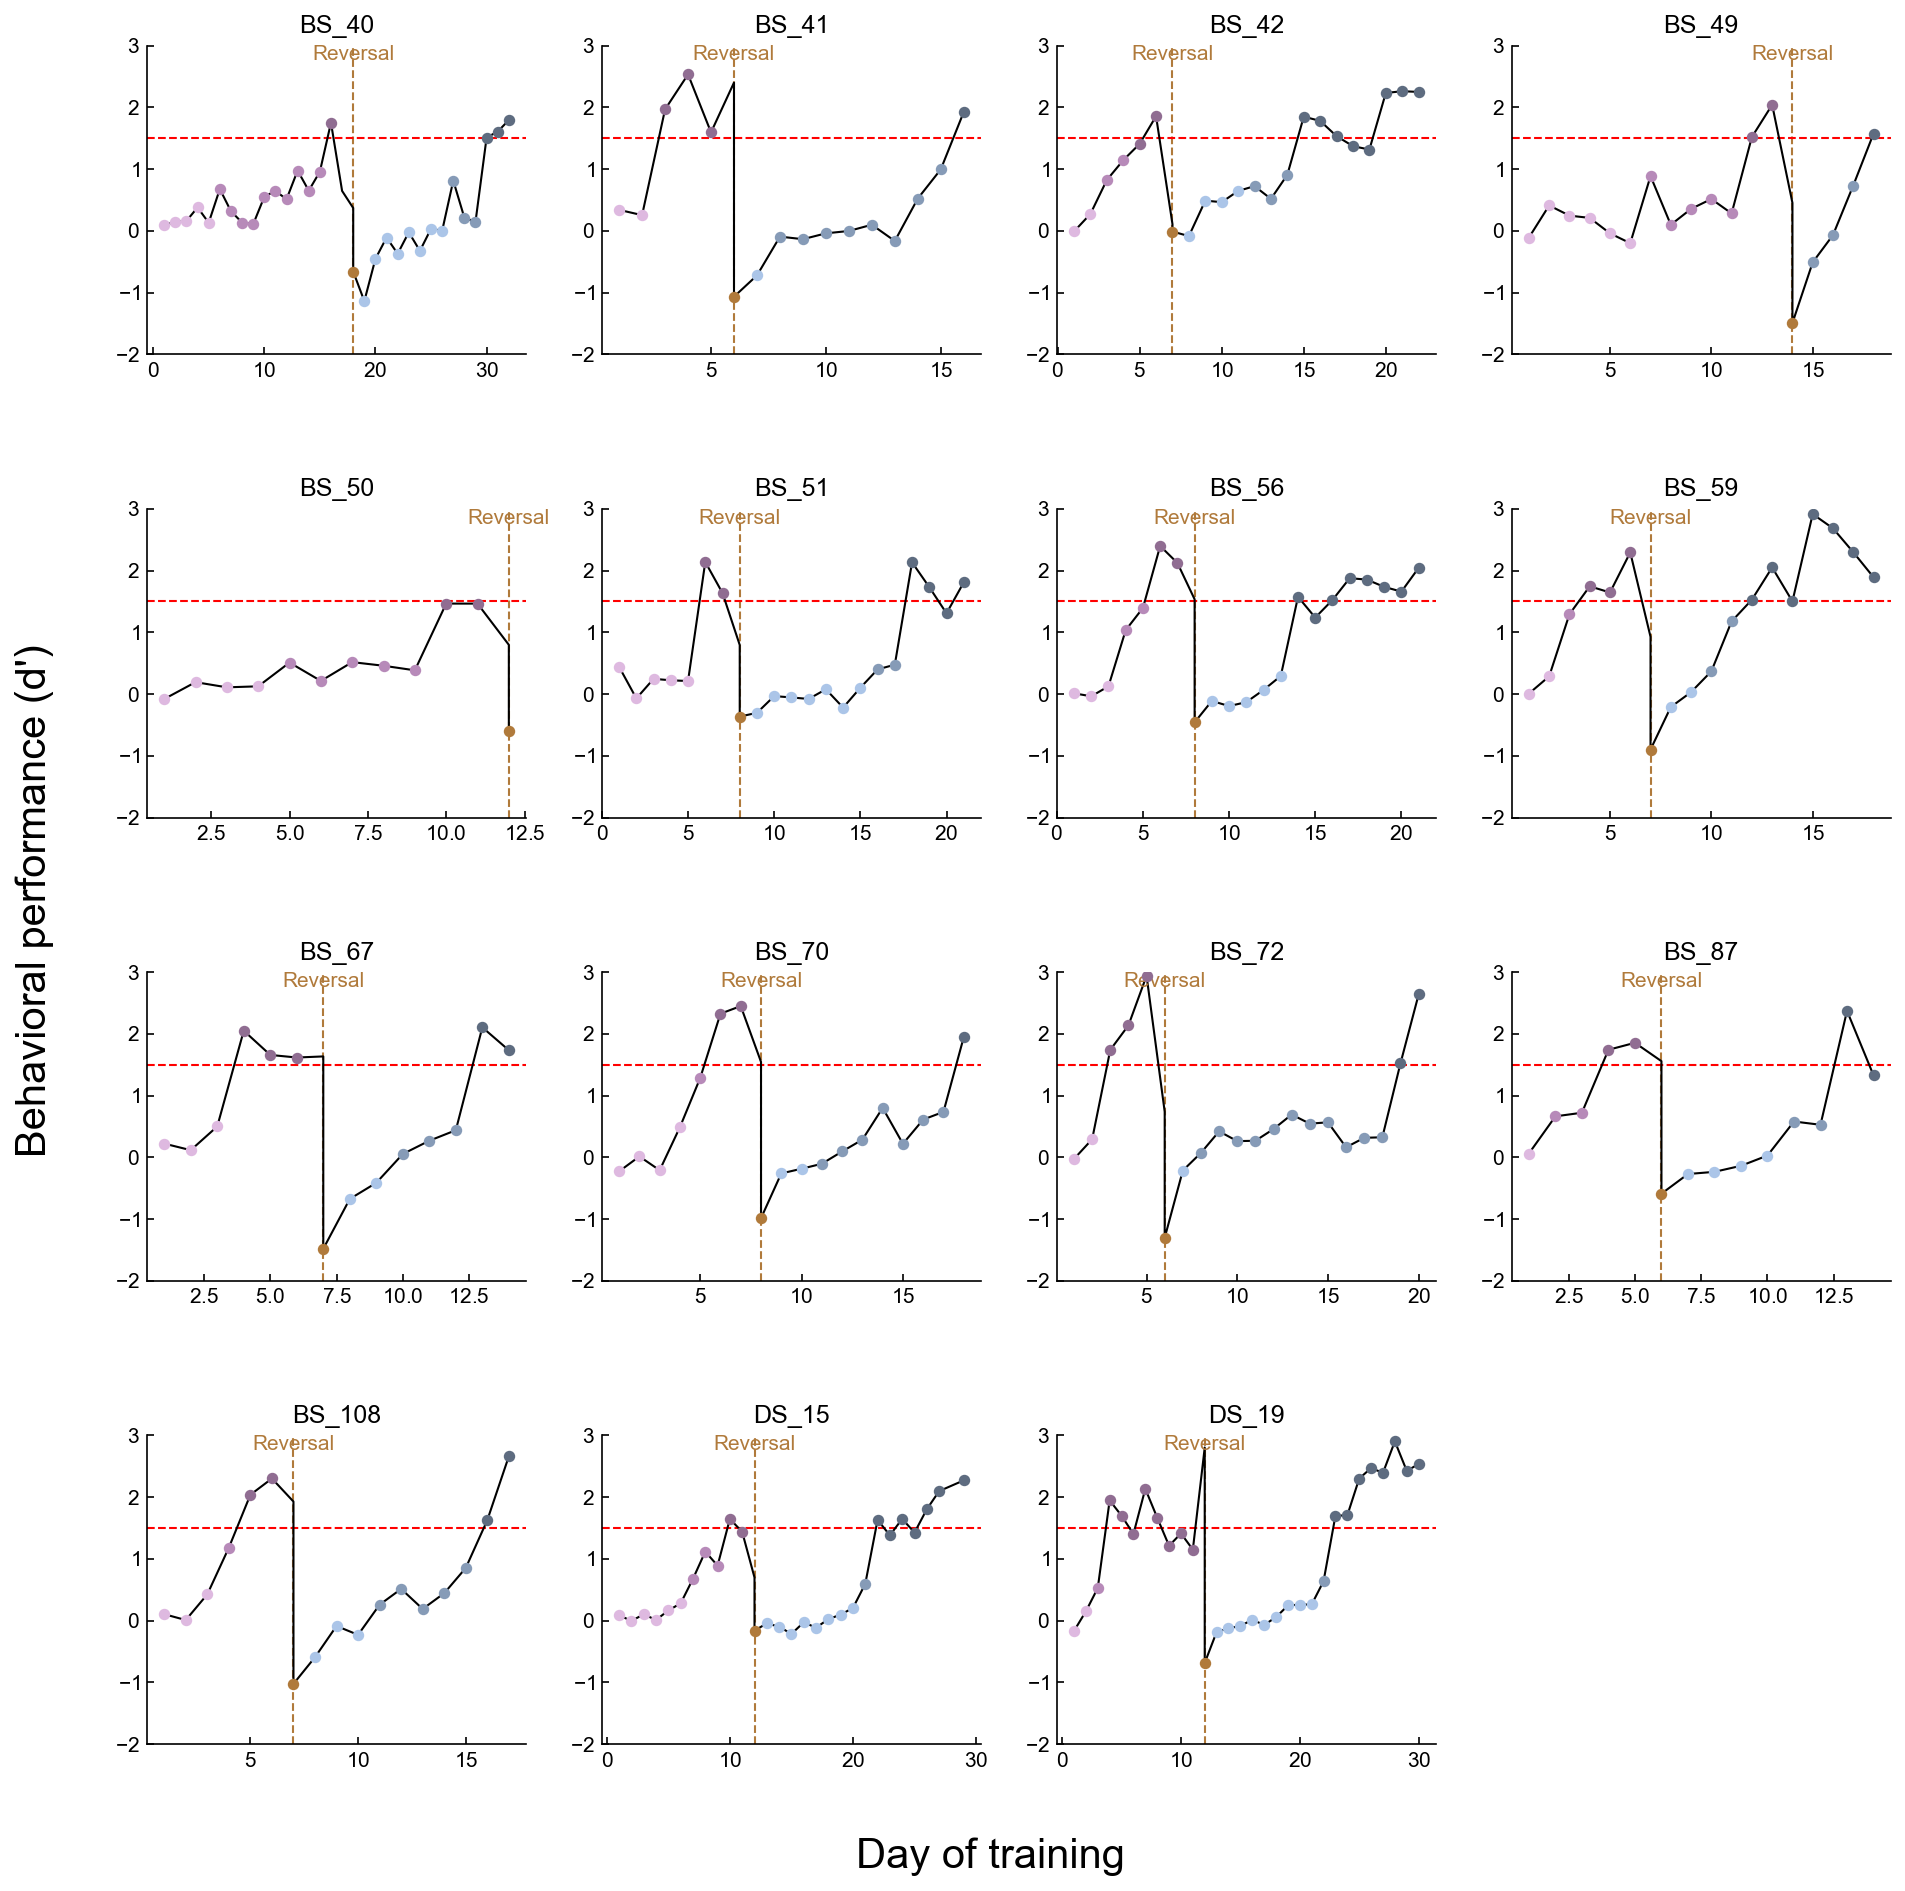

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


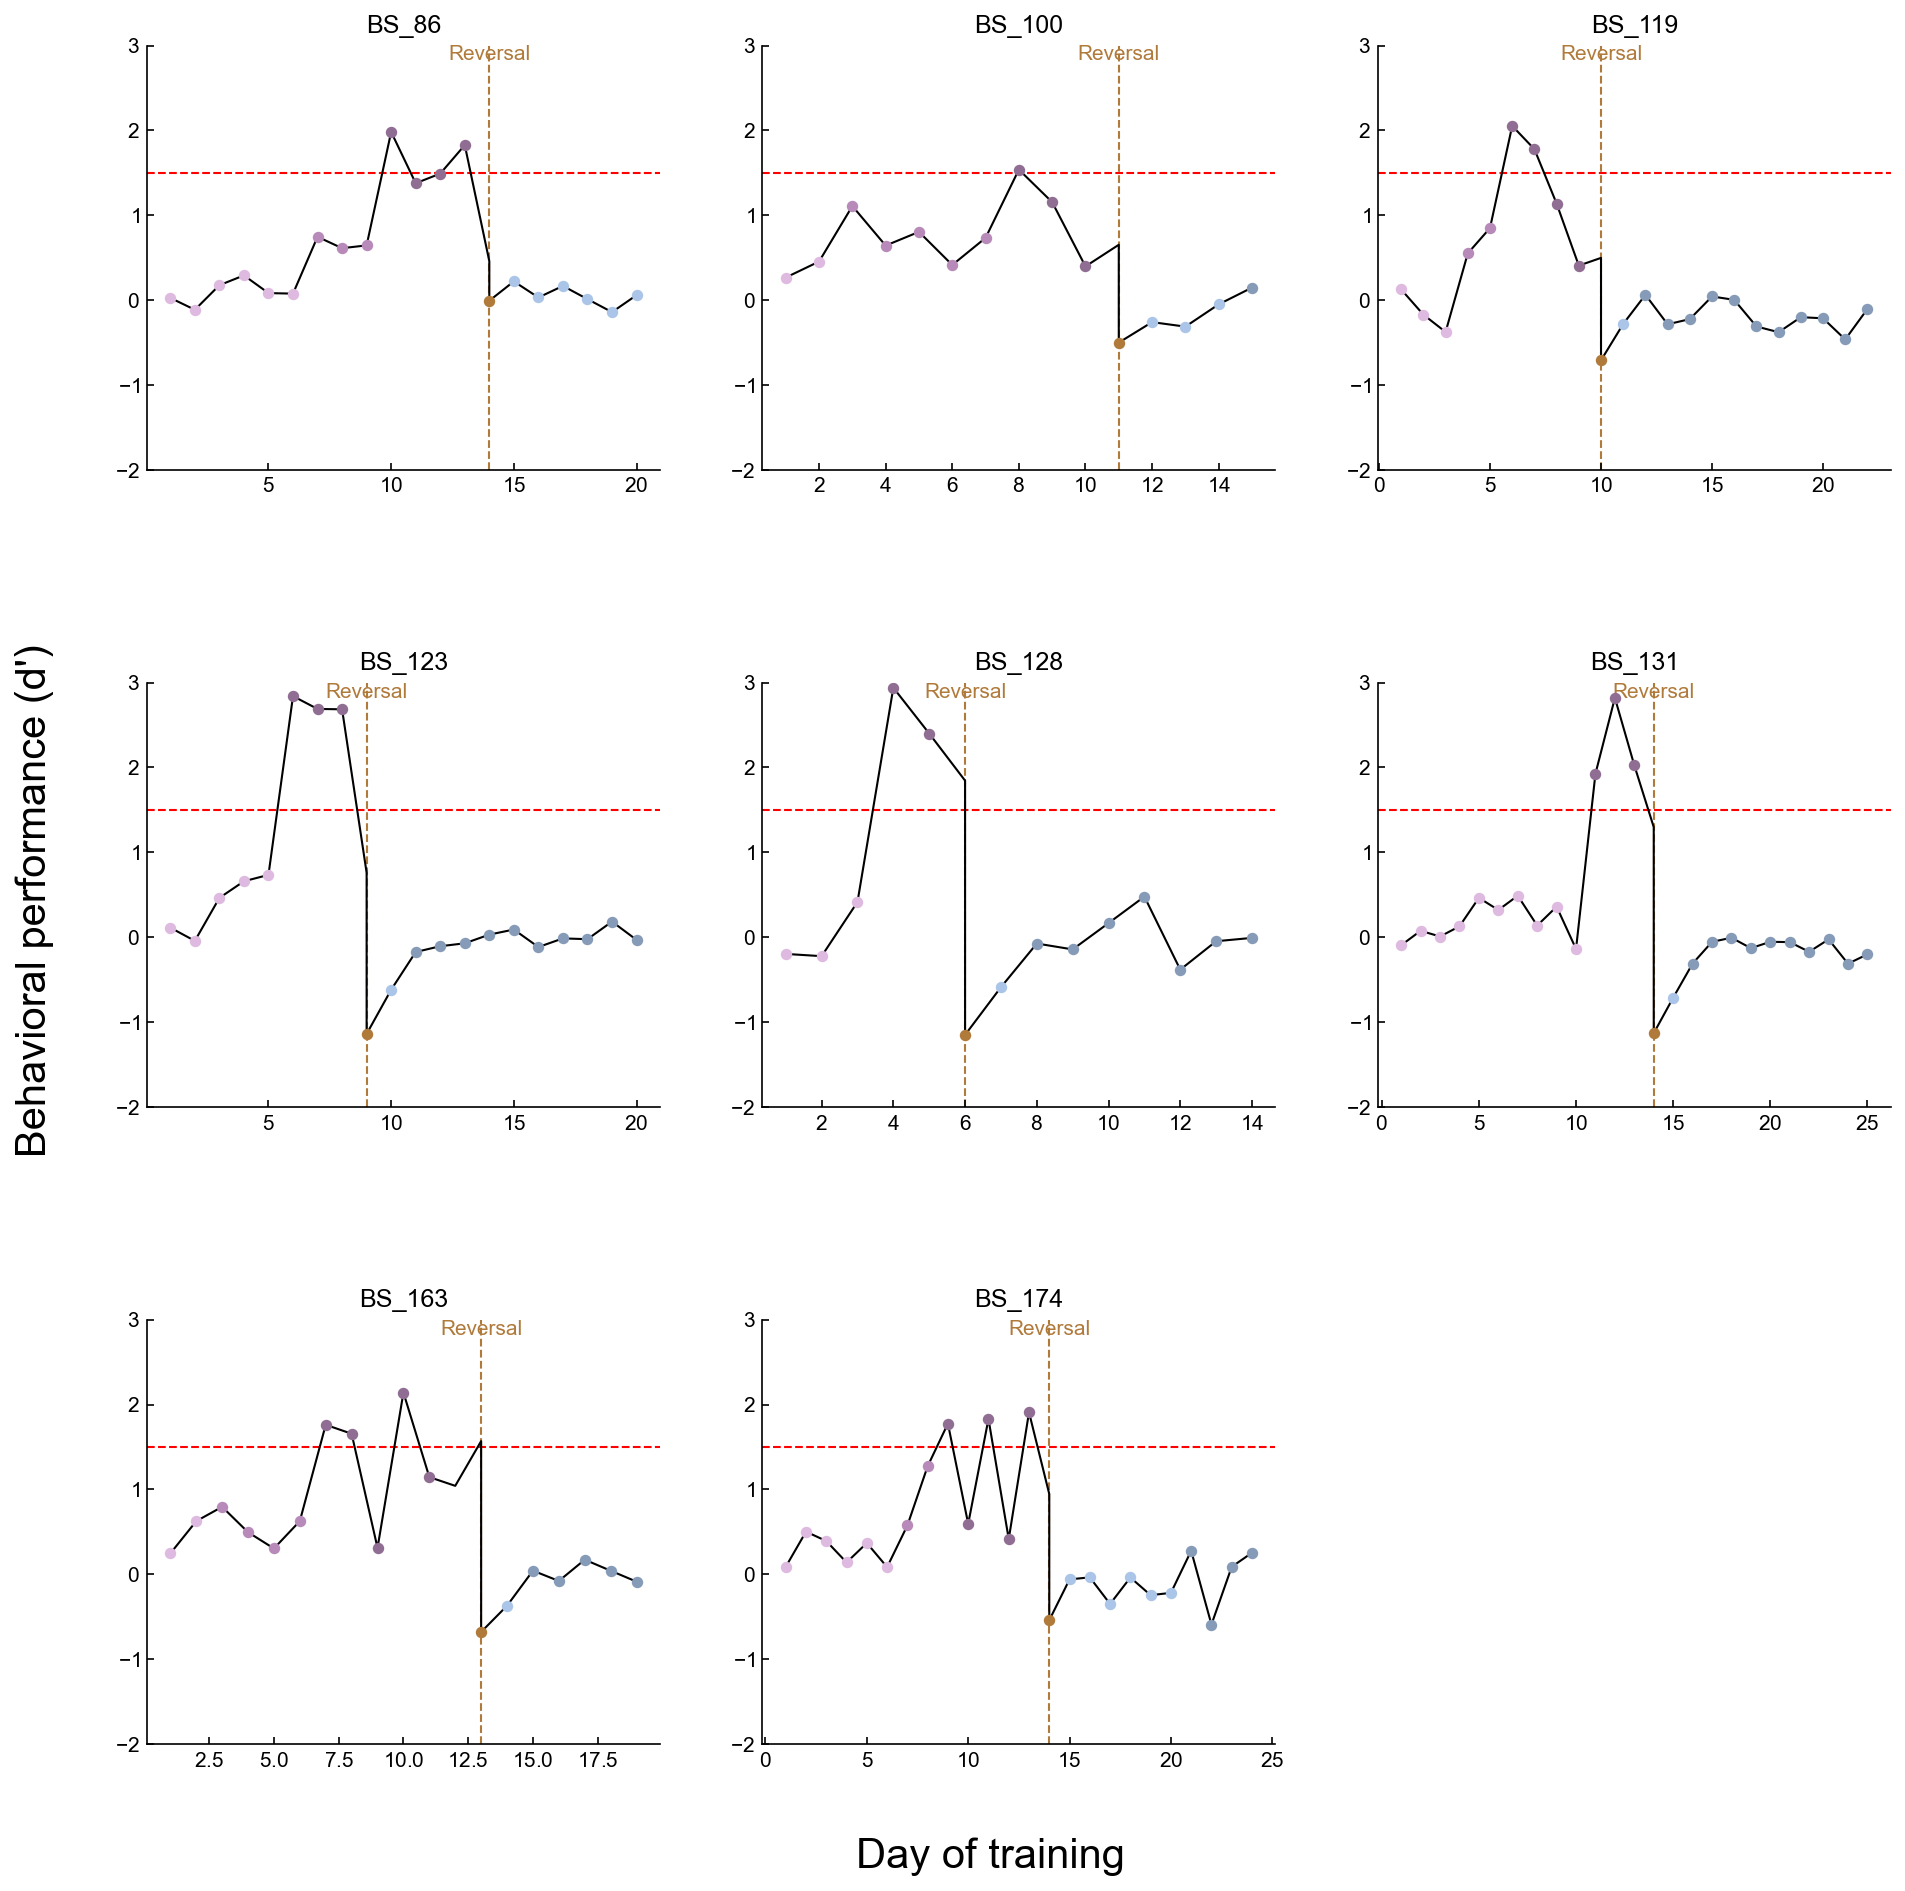

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


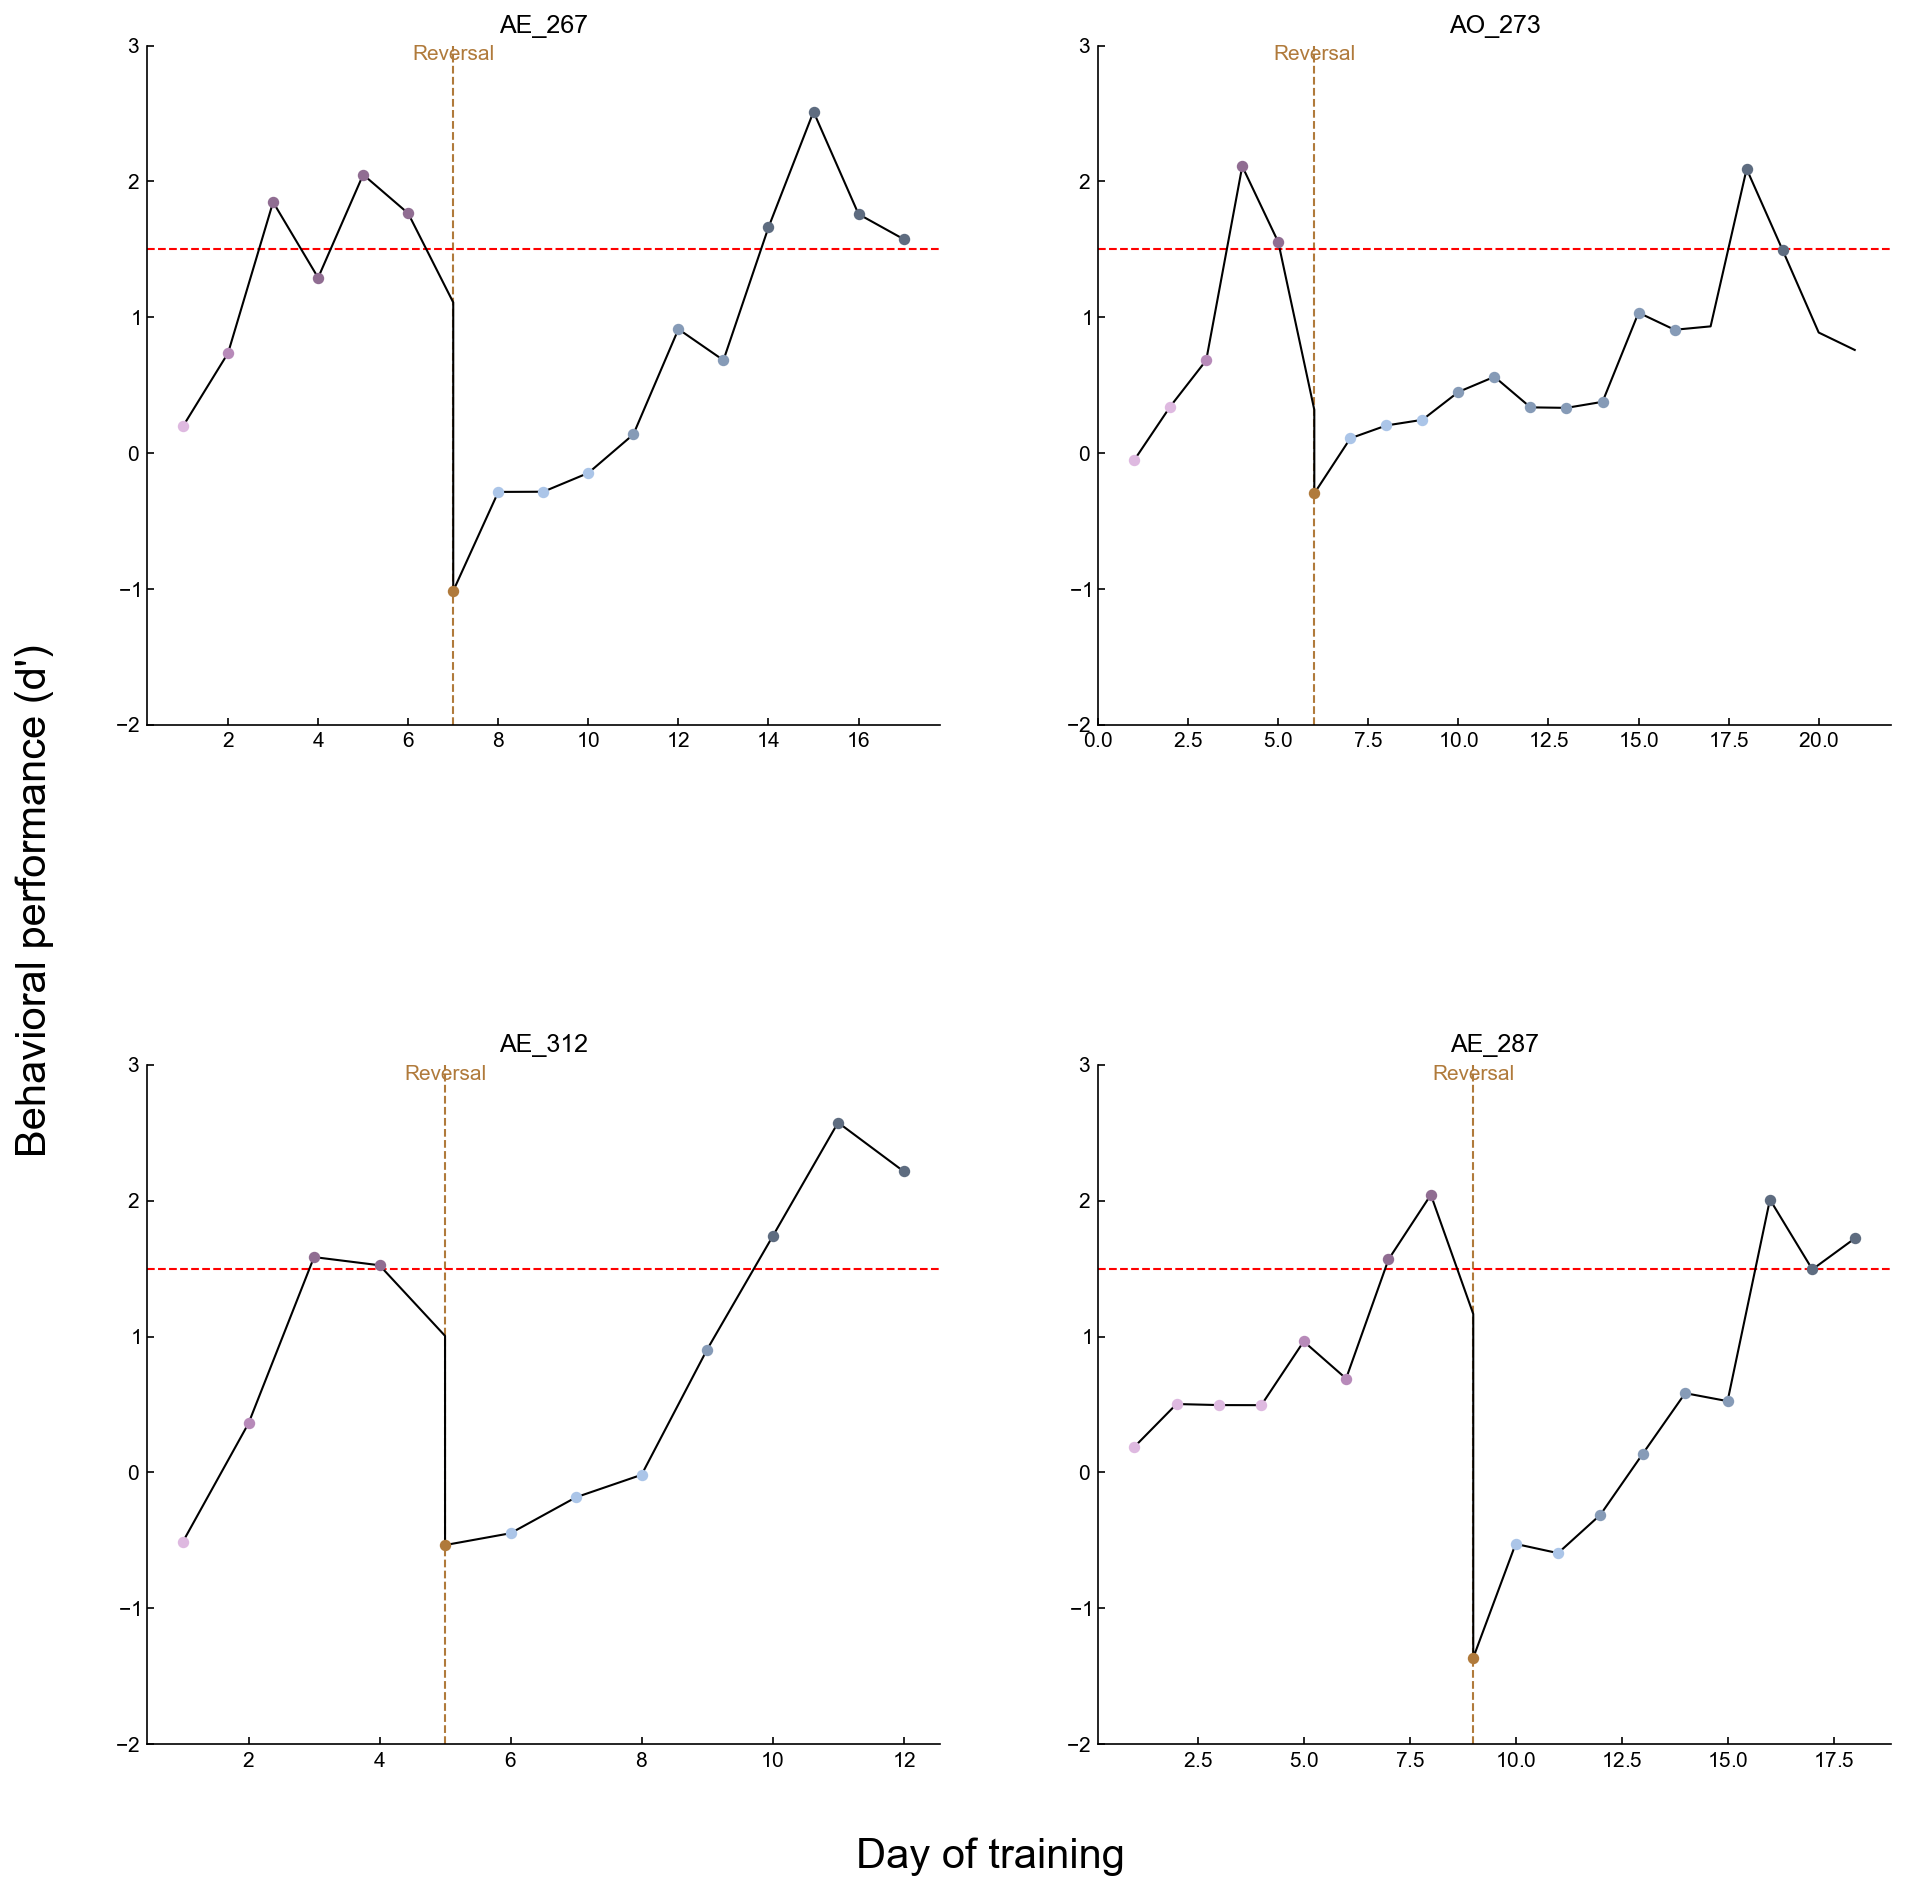

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(ephys_animals,animalBehaviors,plot=True,noTrim=False)
learning_phases2,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
# learning_phasesx,_,_ = ilep.calculateLearningPhasesV2(['BS_111'],animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
learning_phases3,_,_ = ilep.calculateLearningPhasesV2(opsin_control_animals,animalBehaviors,plot=True,noTrim=False)
for d in learning_phases2:
    learning_phases[d] = learning_phases2[d]
for d in learning_phases3:
    learning_phases[d] = learning_phases3[d]

In [5]:
EnumSessionOps = []
EnumClustOps = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
    if sessionfile.meta.task not in ['opto nonreversal','opto switch','opto reversal']:
        continue
        
    if sessionfile.meta.animal not in did_not_learn_animals:
        continue
        
    if hasattr(animalBehaviors[sessionfile.meta.animal],'cloudiness') and sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionOps.append(session)
        EnumClustOps.append(clust)

100%|██████████| 167/167 [00:02<00:00, 65.49it/s] 


In [6]:
EILphasesOps = np.full_like(EnumSessionOps,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionOps)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        day_after_reversal = day - animalBehaviors[animal].reversal
            
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphasesOps[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesOps[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesOps[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesOps[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal <= 4:
            EILphasesOps[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal <= 7:
            EILphasesOps[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day_after_reversal > 7:
            EILphasesOps[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 902/902 [00:21<00:00, 41.68it/s] 

errors for: []


In [7]:
EnumSessionControl = []
EnumClustControl = []
sessions1 = os.listdir(act_directory)
sessions2 = os.listdir(ops_directory)
sessions = np.concatenate((sessions1,sessions2))
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
    
    if sessionfile.meta.region != 'AC':
        continue
    if sessionfile.meta.task not in ['nonreversal','switch','reversal','opto control nonreversal','opto control switch','opto control reversal']:
        continue
        
    if sessionfile.meta.animal not in opsin_control_animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionControl.append(session)
        EnumClustControl.append(clust)

100%|██████████| 907/907 [00:10<00:00, 86.40it/s] 


In [8]:
EILphasesControl = np.full_like(EnumSessionControl,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionControl)):
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch','opto control switch']:
            EILphasesControl[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesControl[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesControl[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesControl[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphasesControl[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphasesControl[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphasesControl[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        raise e
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1357/1357 [00:24<00:00, 56.51it/s] 

errors for: []


In [9]:
def calculate_inter_trial_lick_rate(sessionfile,cond='all_trials'):
    all_conditions = ilep.getAllConditions(sessionfile,None)
    all_trials = all_conditions[cond].trials
    inter_trial_licks = []
    inter_trial_len = []
    
    licks = sessionfile.behavior.lick_times
    for trial in all_trials:
        
        if trial in all_conditions['go'].trials:
            inter_trial_start = sessionfile.trials.response[trial]
        else:
            inter_trial_start = sessionfile.trials.starts[trial] + sessionfile.meta.fs * 2.5
        
        if (trial+1) < sessionfile.meta.length_in_trials:
            inter_trial_end = sessionfile.trials.starts[trial+1]
        else:
            inter_trial_end = sessionfile.trials.starts[trial] + sessionfile.meta.fs * 3
            
        this_inter_trial_licks_1 = np.greater(licks,inter_trial_start)
        this_inter_trial_licks_2 = np.less(licks,inter_trial_end)
        this_inter_trial_licks = np.logical_and(this_inter_trial_licks_1,this_inter_trial_licks_2)
        this_inter_trial_licks = np.sum(this_inter_trial_licks)
        
        this_inter_trial_length = inter_trial_end - inter_trial_start
        this_inter_trial_length = this_inter_trial_length / sessionfile.meta.fs
        
        inter_trial_licks.append(this_inter_trial_licks)
        inter_trial_len.append(this_inter_trial_length)
    
    return np.mean(inter_trial_licks)#inter_trial_licks,inter_trial_len
    
calculate_inter_trial_lick_rate(sessionfile,'go')

11.95045045045045

In [ ]:
InterLick_preearly_Ops = []
InterLick_prelate_Ops = []
InterLick_preexpert_Ops = []
InterLick_postearly_Ops = []
InterLick_postlate_Ops = []
InterLick_postexpert_Ops = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,session in tqdm(enumerate(np.unique(EnumSessionOps))):
# for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
    
    if EILphasesOps[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    inter_trial_licks = calculate_inter_trial_lick_rate(sessionfile,'go')
        
    if EILphasesOps[idx] == 'pre early':
        InterLick_preearly_Ops.append(inter_trial_licks)
    elif EILphasesOps[idx] == 'pre late':
        InterLick_prelate_Ops.append(inter_trial_licks)
    elif EILphasesOps[idx] == 'pre expert':
        InterLick_preexpert_Ops.append(inter_trial_licks)
    elif EILphasesOps[idx] == 'post early':
        InterLick_postearly_Ops.append(inter_trial_licks)
    elif EILphasesOps[idx] == 'post late':
        InterLick_postlate_Ops.append(inter_trial_licks)
    elif EILphasesOps[idx] == 'post expert':
        InterLick_postexpert_Ops.append(inter_trial_licks)

InterLick_preearly_Ops = np.array(InterLick_preearly_Ops)
InterLick_prelate_Ops = np.array(InterLick_prelate_Ops)
InterLick_preexpert_Ops = np.array(InterLick_preexpert_Ops)
InterLick_postearly_Ops = np.array(InterLick_postearly_Ops)
InterLick_postlate_Ops = np.array(InterLick_postlate_Ops)
InterLick_postexpert_Ops = np.array(InterLick_postexpert_Ops)

In [29]:
def get_session(animal,day,noTrim=False):#noTrim is deprecated
    NotFound = True
    for session in np.unique(os.listdir(act_directory)):
        sessionfile = ilep.loadSessionCached(act_directory,session)
        if sessionfile.meta.animal == animal and sessionfile.meta.day_of_training == day:
            NotFound = False
            break
    if NotFound:
        for session in np.unique(os.listdir(ops_directory)):
            sessionfile = ilep.loadSessionCached(ops_directory,session)
            if sessionfile.meta.animal == animal and sessionfile.meta.day_of_training == day:
                NotFound = False
                break
    if NotFound:
        print(f"{animal} day of training {day} not found")
        return None
    else:
        print(f"{animal} day of training {day} found!")
        
    return sessionfile

def get_interlicks(animal,day):
    sessionfile = get_session(animal,day)
    if sessionfile is None:
        return np.nan
    else:
        return calculate_inter_trial_lick_rate(sessionfile,cond='hit')

In [30]:
control_interlicks = []
control_animals = []

days_to_calculate = [0,1,2]
for animal in opsin_control_animals:
    print(animal)
    
    this_animal_interlicks = []
    if animal in ['BS_50']:
        control_interlicks.append(np.nan)
        control_animals.append(animal)
        continue
        
#     test_day = np.nan
#     if len(learning_phases[animal].post_expert_days) >= 3:
#         days_to_calculate_animal = np.sort(learning_phases[animal].post_expert_days)[0:3]
#     else:
#         try:
#             max_day = np.max([k for k in animalBehaviors[animal].sessions]) - animalBehaviors[animal].reversal
#             if max_day > 12:
#                 max_day = 12
#             test_day = animalBehaviors[animal].reversal + max_day
#             days_to_calculate_animal = [test_day,test_day-1,test_day-2]
            
#             if max_day < 6:
#                 days_to_calculate_animal = [np.nan,np.nan,np.nan]
#         except Exception as e:
#             print(f"{animal}: {e}")
#             pass
        
    if len(learning_phases[animal].post_early_days) >= 3:
        days_to_calculate_animal = np.sort(learning_phases[animal].post_early_days)[0:3]
    else:
        days_to_calculate_animal = [animalBehaviors[animal].reversal+1,animalBehaviors[animal].reversal+2,animalBehaviors[animal].reversal+3]
        
    print(f"{animal}: {days_to_calculate_animal}")

    control_interlicks.append(np.nanmean([get_interlicks(animal,x) for x in days_to_calculate_animal]))

AE_267
AE_267: [ 8  9 10]
AE_267 day of training 8 found!
AE_267 day of training 9 found!
AE_267 day of training 10 found!
AO_273
AO_273: [7 8 9]
AO_273 day of training 7 found!
AO_273 day of training 8 not found
AO_273 day of training 9 found!
AE_312
AE_312: [6 7 8]
AE_312 day of training 6 found!
session AE_312_2_AC_03-28-2024 clust None tried to load saved active trials but failed. Error: 'AE_312'
session AE_312_2_AC_03-28-2024 clust None tried to load saved active trials but failed. Error: 'AE_312'
session AE_312_2_AC_03-28-2024 clust None tried to load saved active trials but failed. Error: 'AE_312'
session AE_312_2_AC_03-28-2024 clust None tried to load saved active trials but failed. Error: 'AE_312'
session AE_312_2_AC_03-28-2024 clust None tried to load saved active trials but failed. Error: 'AE_312'
session AE_312_2_AC_03-28-2024 clust None tried to load saved active trials but failed. Error: 'AE_312'
session AE_312_2_AC_03-28-2024 clust None tried to load saved active trials 

In [31]:
opsin_interlicks = []
opsin_animals = []

days_to_calculate = [0,1,2]
for animal in did_not_learn_animals:
    print(animal)
#     test_day = np.nan
#     try:
#         max_day = np.max([k for k in animalBehaviors[animal].sessions]) - animalBehaviors[animal].reversal
#         if max_day > 12:
#             max_day = 12
        
#         if animalBehaviors[animal].cloudiness <= max_day:
#             max_day = animalBehaviors[animal].cloudiness - 1
            
#         if max_day < 6:
#             continue
            
#         test_day = animalBehaviors[animal].reversal + max_day
#         days_to_calculate_animal = [test_day,test_day-1,test_day-2]
        
    
        
#     except Exception as e:
#         raise e
#         pass

    days_to_calculate_animal = [animalBehaviors[animal].reversal+1,animalBehaviors[animal].reversal+2,animalBehaviors[animal].reversal+3]
    
    if animal == 'BS_100':                     #Do this for the paired analyses. BS_100 has no cutoff day data
        continue
    
    opsin_interlicks.append(np.nanmean([get_interlicks(animal,x) for x in days_to_calculate_animal]))

BS_86
BS_86 day of training 15 found!
BS_86 day of training 16 found!
BS_86 day of training 17 found!
BS_100
BS_119
BS_119 day of training 11 found!
BS_119 day of training 12 found!
BS_119 day of training 13 found!
BS_123
BS_123 day of training 10 found!
BS_123 day of training 11 found!
BS_123 day of training 12 found!
BS_128
BS_128 day of training 7 found!
BS_128 day of training 8 found!
BS_128 day of training 9 found!
BS_131
BS_131 day of training 15 found!
BS_131 day of training 16 found!
BS_131 day of training 17 found!
BS_163
BS_163 day of training 14 found!
BS_163 day of training 15 not found
BS_163 day of training 16 not found
BS_174
BS_174 day of training 15 found!
BS_174 day of training 16 found!
BS_174 day of training 17 not found


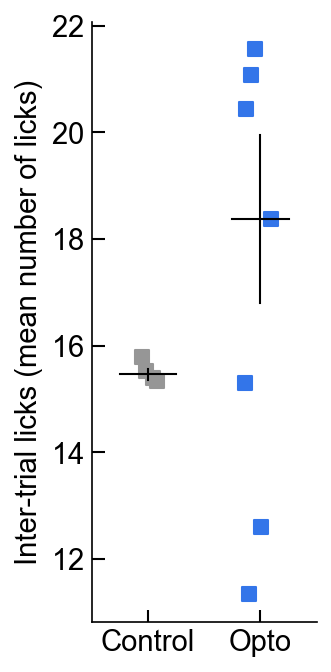

In [32]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

X,Y = ilep.violin(np.ones_like(opsin_interlicks),opsin_interlicks,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_interlicks)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_interlicks)-data_sem,np.median(opsin_interlicks)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_interlicks),control_interlicks,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_interlicks)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_interlicks)-data_sem,np.median(control_interlicks)+data_sem],lw=1,color='k')

################################################################################################################

labels = ['Control','Opto']

# ax.set_ylim([-0.5,2.5])
ylab = ax.set_ylabel('Inter-trial licks (mean number of licks)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opto'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall interlicks at start V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [33]:
ttest_ind(control_interlicks,opsin_interlicks)

Ttest_indResult(statistic=-0.8083304758218597, pvalue=0.43974324106278884)